In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib  import Path
import os

In [ ]:
import zipfile

# Step 2: Extract ZIP from Drive
import zipfile
zip_path = "/content/drive/MyDrive/Colab Notebooks/archive (6).zip"  # change if needed
extract_dir = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
def load_image(image_path,label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
test_normal_path="/content/data/chest_xray/train/NORMAL"
test_pneumonia_path="/content/data/chest_xray/train/PNEUMONIA"

In [ ]:
from operator import le
## get all .jpeg files
normal_images=list(Path(test_normal_path).glob("*.jpeg"))
pneumonia_images=list(Path(test_pneumonia_path).glob("*.jpeg"))
print(len(normal_images))
print(len(pneumonia_images))

1341
3875


In [ ]:
##convert path object to string
normal_images=[str(path) for path in normal_images]
pneumonia_images=[str(path) for path in pneumonia_images]

In [ ]:
##create the label:0 for normal and 1 for pneumonia
normal_labels=[0]*len(normal_images)
pneumonia_labels=[1]*len(pneumonia_images)

In [ ]:
## combine data and labels
all_image_paths=normal_images+pneumonia_images
all_labels=normal_labels+pneumonia_labels
print(len(all_image_paths))
print(len(all_labels))

5216
5216


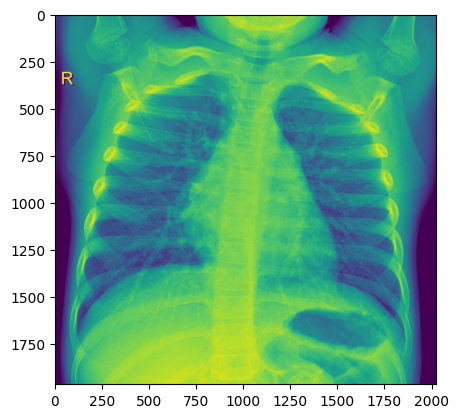

In [ ]:
from PIL import Image
img=Image.open(all_image_paths[0])
plt.imshow(img)

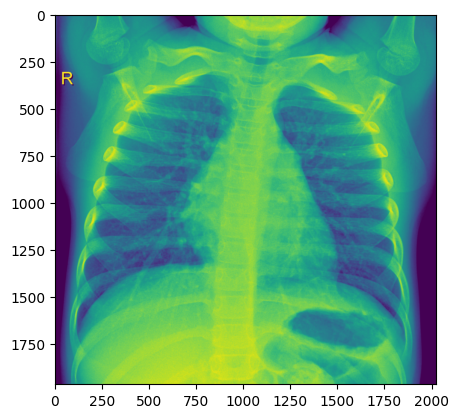

In [ ]:
plt.imshow(tf.io.decode_jpeg(tf.io.read_file(all_image_paths[0])))

In [ ]:
##create tensorflow dataset
train_ds=tf.data.Dataset.from_tensor_slices((all_image_paths,all_labels))

In [ ]:
len(train_ds)

5216

In [ ]:
train_ds=train_ds.map(load_image).shuffle(100)


In [ ]:
# len(train_ds)
# for img, label in train_ds.take(40):
#     plt.imshow(img.numpy())
#     plt.title(f"Label: {'Normal' if label.numpy() == 0 else 'Pneumonia'}")
#     plt.axis('off')
#     plt.show()

In [ ]:
train_ds = train_ds.cache()        
train_ds = train_ds.shuffle(100)       
train_ds = train_ds.batch(32)          
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)


In [ ]:
print(len(train_ds))

163


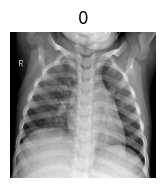

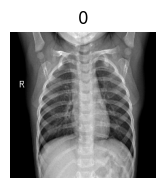

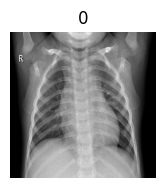

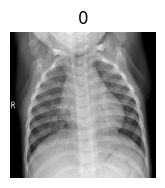

In [ ]:
for batchs,labels in train_ds.take(4):
  for i in range(1):
    plt.subplot(2,3,i+1)
    plt.imshow(batchs[i])
    plt.title(labels[i].numpy())
    plt.axis("off")
  plt.show()

In [ ]:
val_path_normal="/content/data/chest_xray/val/NORMAL"
val_path_pneumonia="/content/data/chest_xray/val/PNEUMONIA"

In [ ]:
##  get all .jpeg files
val_normal_images=list(Path(val_path_normal).glob("*.jpeg"))
val_pneumonia_images=list(Path(val_path_pneumonia).glob("*.jpeg"))

In [ ]:
## conver the object to strings
val_normal_images=[str(path) for path in val_normal_images]
val_pneumonia_images=[str(path) for path in val_pneumonia_images]

In [ ]:
# Create labels: 0 for normal, 1 for pneumonia
val_normal_labels = [0] * len(val_normal_images)
val_pneumonia_labels = [1] * len(val_pneumonia_images)

In [ ]:
## combine the data and labels
val_all_image = val_normal_images + val_pneumonia_images
val_all_labels = val_normal_labels + val_pneumonia_labels

In [ ]:
val_ds=tf.data.Dataset.from_tensor_slices((all_image_paths,all_labels))

In [ ]:
val_ds=val_ds.map(load_image)

In [ ]:
len(val_ds)

5216

In [ ]:
val_ds=val_ds.cache()
val_ds=val_ds.batch(32)
val_ds=val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3),padding='same', activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3,padding='same',activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3,padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,479,105 (24.72 MB)

 Trainable params: 6,479,105 (24.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
## checking shape of train_ds
for img,label in train_ds.take(1):
  print(img.shape)

(32, 224, 224, 3)


In [ ]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 461ms/step - accuracy: 0.9601 - loss: 0.9079 - val_accuracy: 0.7429 - val_loss: 3.0593
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7850 - loss: 1.4975 - val_accuracy: 0.7429 - val_loss: 32.1093
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.7282 - loss: 12.2711 - val_accuracy: 0.7429 - val_loss: 5.6685
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.7463 - loss: 2.5406 - val_accuracy: 0.7429 - val_loss: 3.4093
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.6719 - loss: 1.9743 - val_accuracy: 0.7429 - val_loss: 2.3643
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.4117 - loss: 1.6240 - val_accuracy: 0.7429 - val_loss: 0.6734
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.3992 - loss: 0.7020 - val_accuracy: 0.7429 - val_loss: 0.6532
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.3995 - loss: 0.7152

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9518 - loss: 7.1616 - val_accuracy: 0.7429 - val_loss: 6.4234
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.4068 - loss: 3.0894 - val_accuracy: 0.7429 - val_loss: 20.8551
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.7534 - loss: 9.3645 - val_accuracy: 0.7429 - val_loss: 3.6742
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.3543 - loss: 2.3238 - val_accuracy: 0.7429 - val_loss: 0.6750
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.3993 - loss: 0.7011 - val_accuracy: 0.7429 - val_loss: 0.6557
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.3993 - loss: 0.7134 - val_accuracy: 0.7429 - val_loss: 0.6407
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.3994 - loss: 0.7256 - val_accuracy: 0.7429 - val_loss: 0.6287
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.3994 - loss: 

In [ ]:
# base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False, input_shape=(224, 224, 3), weights='imagenet'
)
base_model.trainable = False  # Freeze for initial training

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.8342 - loss: 0.4726 - val_accuracy: 0.7429 - val_loss: 1.2583
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.5315 - loss: 1.5389 - val_accuracy: 0.7429 - val_loss: 1.2480
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.5185 - loss: 1.5769 - val_accuracy: 0.7429 - val_loss: 1.2367
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.5180 - loss: 1.5736 - val_accuracy: 0.7429 - val_loss: 1.2345
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.5124 - loss: 1.5771 - val_accuracy: 0.7429 - val_loss: 1.2330
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.5126 - loss: 1.5804 - val_accuracy: 0.7429 - val_loss: 1.2316
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.5119 - loss: 1.5770 - val_accuracy: 0.7429 - val_loss: 1.2308
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.5089 - loss: 1.5800 -